In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_fscore_support, plot_confusion_matrix, plot_precision_recall_curve

In [2]:
df = pd.read_csv('../data/loan_data.csv')

In [3]:
df.columns = [x.replace('.','_') for x in df.columns]
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [4]:
df['fully_paid'] = 1 - df.not_fully_paid
df.drop('not_fully_paid', axis=1, inplace=True)

# Splitting the data

In [5]:
X = df.drop('fully_paid', axis = 1)
y = df.fully_paid
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=675, test_size=0.2)

# Base Model

In [6]:
cat_features = df.select_dtypes('object').columns
cat_transformer = Pipeline(steps=[('label',OneHotEncoder(handle_unknown='error'))])
preprocessor = ColumnTransformer(transformers=[
    ('cat',cat_transformer,cat_features)])

gb1 = Pipeline(steps =[
    ('preprocessor',preprocessor),
    ('rf_classifier', GradientBoostingClassifier())])

In [7]:
gb1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder())]),
                                                  Index(['purpose'], dtype='object'))])),
                ('rf_classifier', GradientBoostingClassifier())])

In [8]:
training_scores = precision_recall_fscore_support(gb1.predict(X_train), y_train, average='binary')
print("precision score: ",training_scores[0])
print("recall score for: ", training_scores[1])
print("f1 score for: ", training_scores[2])

precision score:  1.0
recall score for:  0.8389454450535109
f1 score for:  0.9124201561391059


In [9]:
y_preds = gb1.predict(X_test)
scores = precision_recall_fscore_support(y_preds, y_test, average='binary')
print("precision score: ",scores[0])
print("recall score for: ", scores[1])
print("f1 score for: ", scores[2])

precision score:  1.0
recall score for:  0.843945720250522
f1 score for:  0.9153693744692896


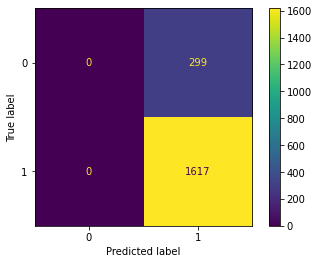

In [10]:
plot_confusion_matrix(gb1,X_test,y_test)

Again this doesn't work because of the imbalance.  Will have to try with 